1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
train = pd.read_csv('SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train.shape

(30161, 14)

In [9]:
test.shape

(15060, 14)

In [10]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

#### Categorical Columns

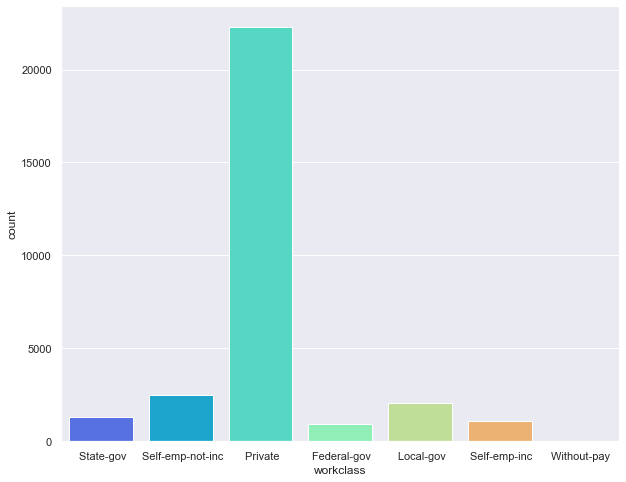

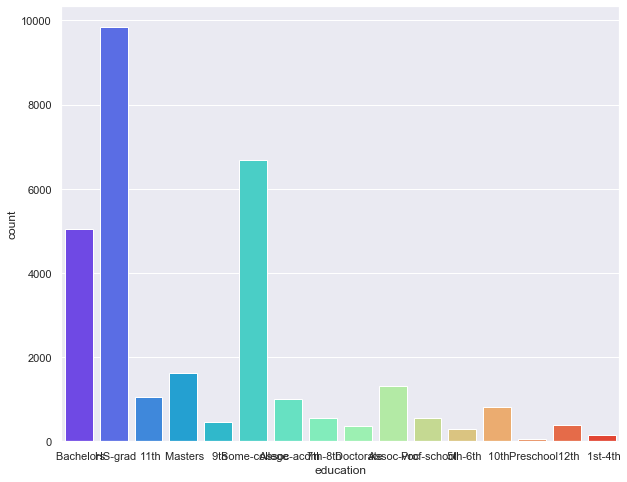

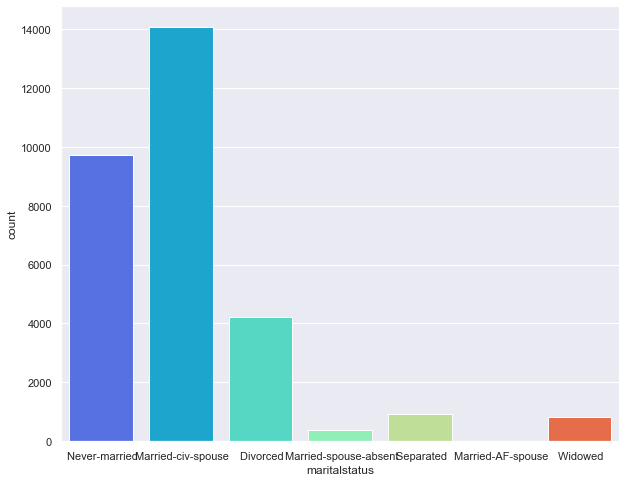

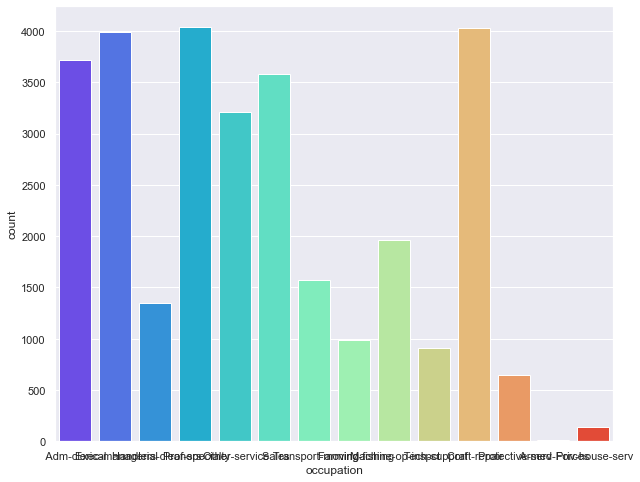

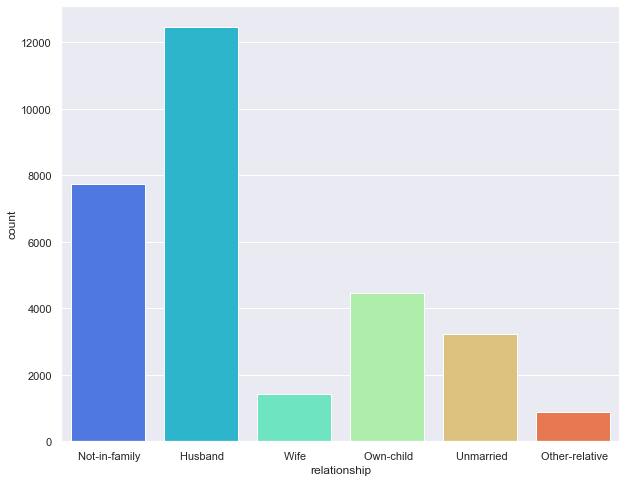

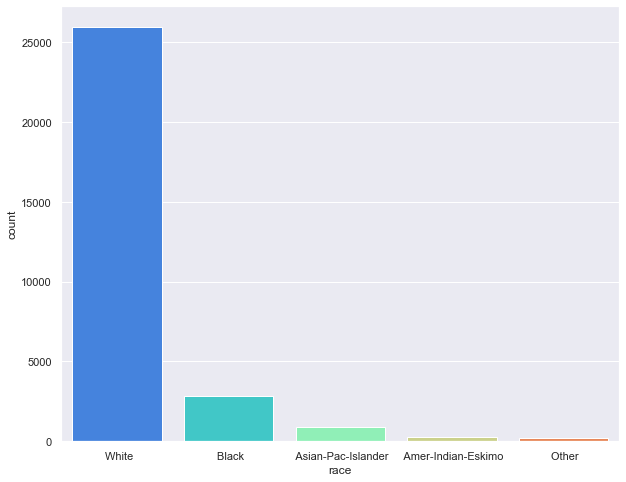

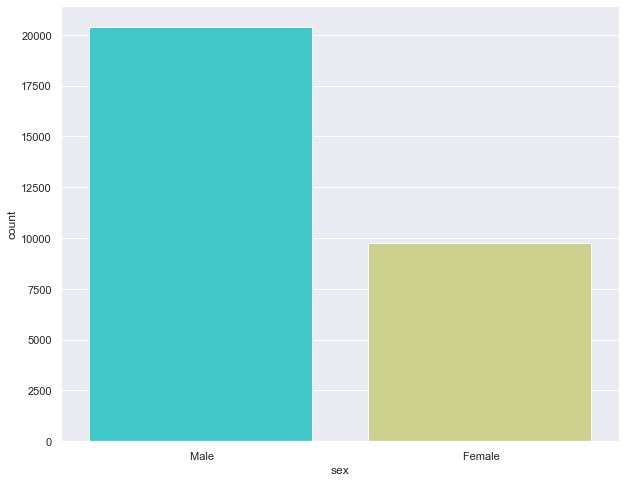

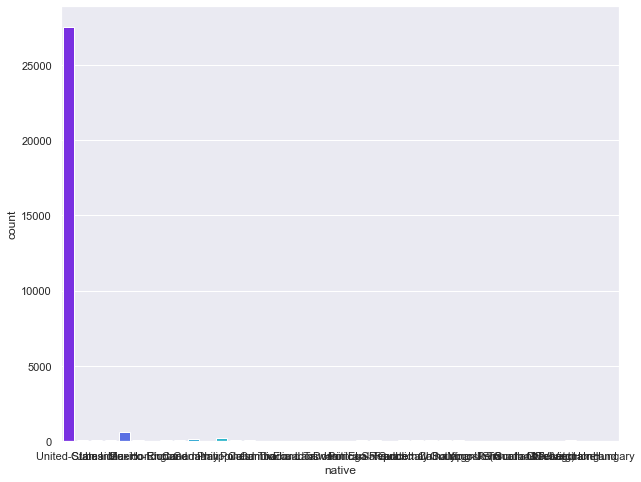

In [11]:
sns.set(rc = {'figure.figsize' : (10,8)})
categ = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for c in categ:
    plt.figure()
    sns.countplot(x = c, data = train, palette='rainbow');

<AxesSubplot:xlabel='workclass', ylabel='count'>

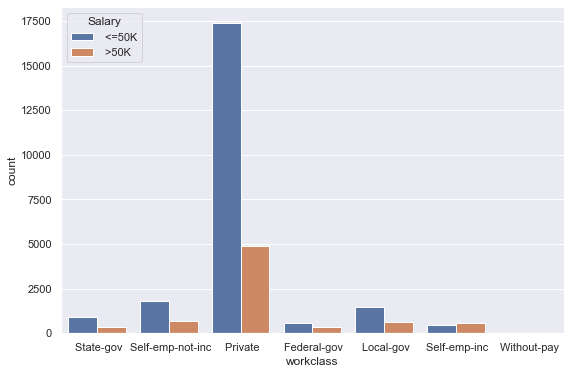

In [12]:
fig, ax = plt.subplots(figsize = (9,6))
sns.countplot(ax = ax, data = train, x = 'workclass', hue = 'Salary')

<AxesSubplot:xlabel='occupation', ylabel='count'>

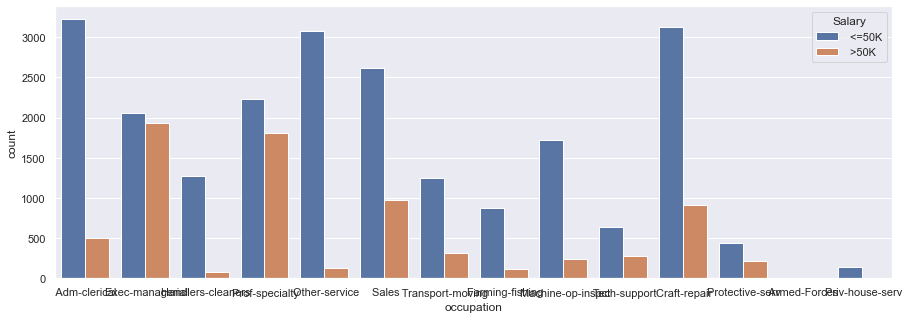

In [13]:
fig, ax = plt.subplots(figsize = (15,5))
sns.countplot(data = train, x = 'occupation', hue = 'Salary')

<AxesSubplot:xlabel='workclass', ylabel='count'>

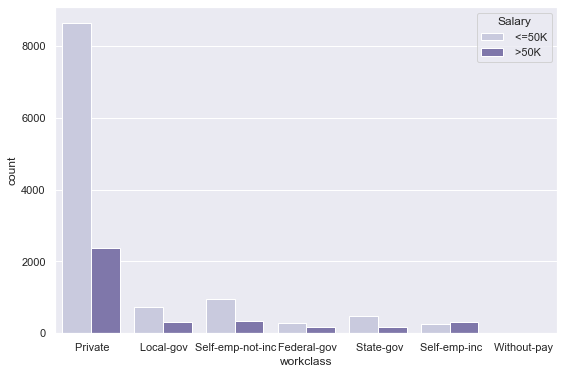

In [14]:
fig, ax = plt.subplots(figsize = (9,6))
sns.countplot(ax = ax, data = test, x = 'workclass', hue = 'Salary', palette='Purples')

<AxesSubplot:xlabel='occupation', ylabel='count'>

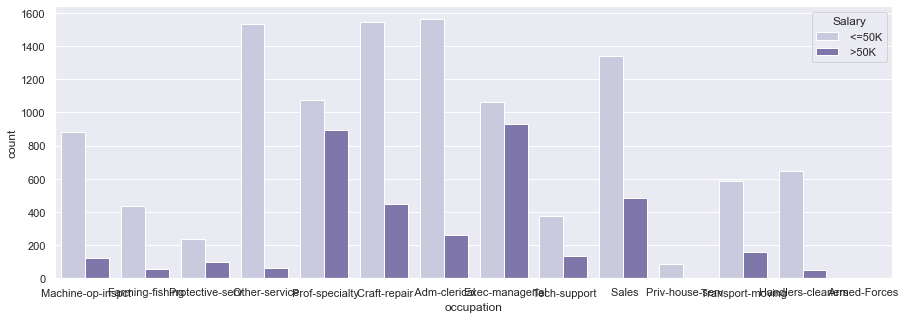

In [15]:
fig, ax = plt.subplots(figsize = (15,5))
sns.countplot(data = test, x = 'occupation', hue = 'Salary', palette = 'Purples')

In [16]:
clist = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
label = LabelEncoder()
for i in clist:
    train[i] = label.fit_transform(train[i])

for i in clist:
    test[i] = label.fit_transform(test[i])

In [17]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [18]:
x = train.drop(['Salary'], axis=1)
y = train[['Salary']]

In [19]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [20]:
y

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
30156,<=50K
30157,>50K
30158,<=50K
30159,<=50K


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)

## KNN model

In [22]:
svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
print(classification_report(y_test, prediction))
print('\n\n', confusion_matrix(y_test, prediction))
print('\n Accuracy : ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      7458
        >50K       0.75      0.26      0.39      2496

    accuracy                           0.79      9954
   macro avg       0.78      0.62      0.63      9954
weighted avg       0.79      0.79      0.75      9954



 [[7245  213]
 [1845  651]]

 Accuracy :  0.7932489451476793


In [23]:
x1 = test.drop(['Salary'], axis=1)
y1 = test[['Salary']]

In [24]:
x1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [25]:
y1

,Salary
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
15055,<=50K
15056,<=50K
15057,<=50K
15058,<=50K


In [26]:
pred_test = svc.predict(x1)
print(classification_report(y1, pred_test))
print('\n\n', confusion_matrix(y1, pred_test))
print('\n Accuracy : ', accuracy_score(y1, pred_test))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     11360
        >50K       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



 [[10997   363]
 [ 2703   997]]

 Accuracy :  0.7964143426294821


classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'

day	day of the week: 'mon' to 'sun'

FFMC	FFMC index from the FWI system: 18.7 to 96.20

DMC	DMC index from the FWI system: 1.1 to 291.3

DC	DC index from the FWI system: 7.9 to 860.6

ISI	ISI index from the FWI system: 0.0 to 56.10

temp	temperature in Celsius degrees: 2.2 to 33.30

RH	relative humidity in %: 15.0 to 100

wind	wind speed in km/h: 0.40 to 9.40

rain	outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie 	the burned area of the forest ( Small , Large)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
fire = pd.read_csv('forestfires.csv')
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [29]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [30]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:>

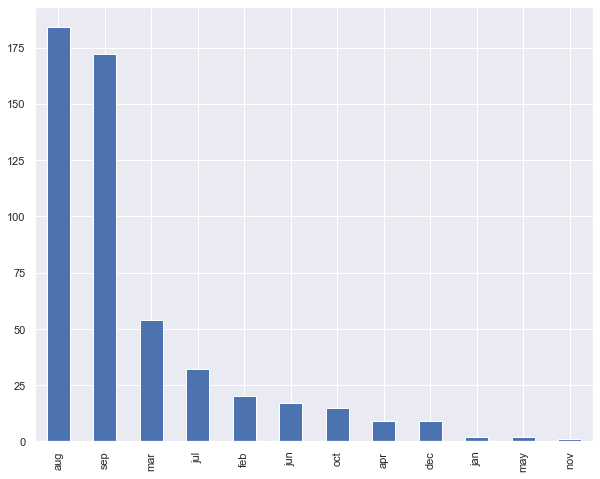

In [32]:
fire['month'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

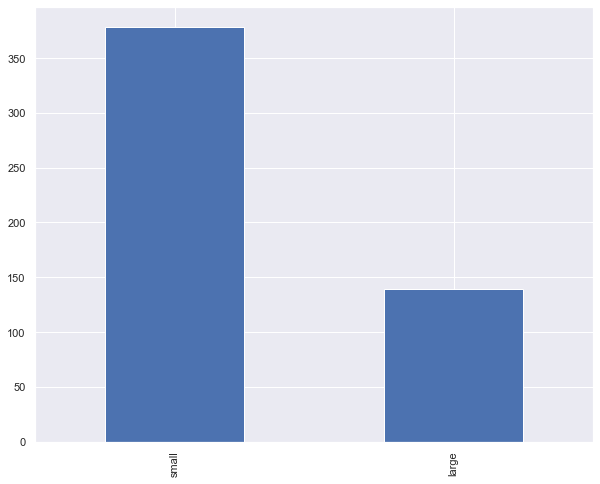

In [33]:
fire['size_category'].value_counts().plot(kind = 'bar')

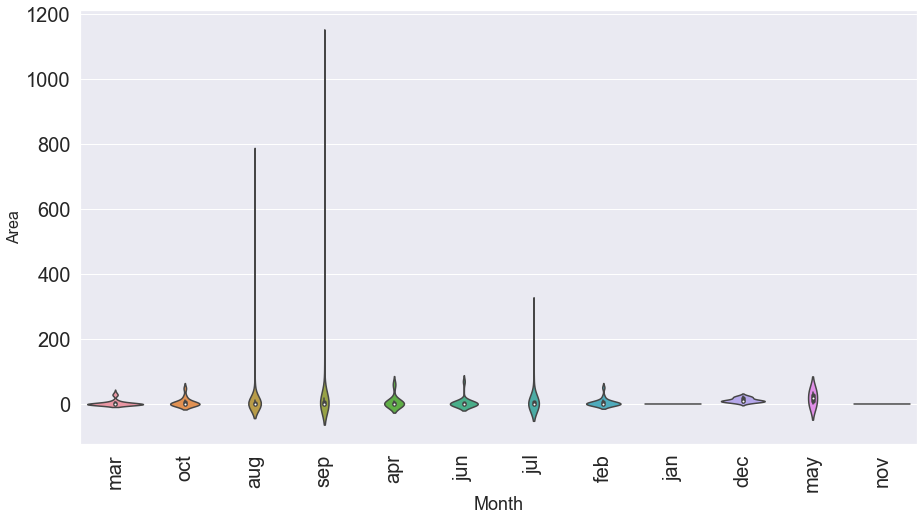

In [34]:
plt.figure(figsize=(15, 8))
sns.violinplot(x = 'month', y = 'area', data = fire)
plt.xticks(rotation = 90, size = 20)
plt.yticks(size = 20)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Area', fontsize = 16)
plt.show()

In [35]:
fire = fire.drop(labels = ['month', 'day'], axis = 1)
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:>

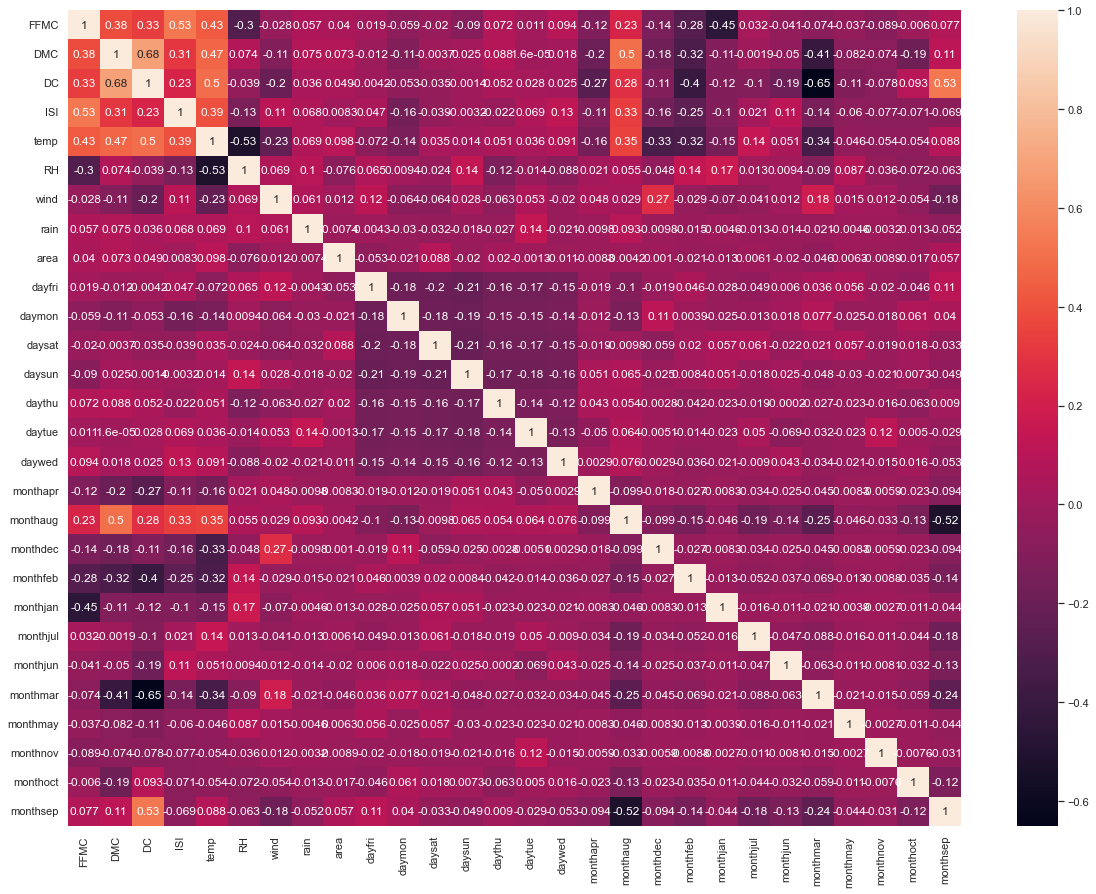

In [36]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(fire.corr(), annot=True)

In [37]:
fire['size_category'].unique()

array(['small', 'large'], dtype=object)

In [38]:
fire['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [39]:
encode = LabelEncoder()
fire['size_category'] = encode.fit_transform(fire['size_category'])

In [40]:
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
minmax = MinMaxScaler()
array = fire.values
scaled = minmax.fit_transform(array)
scaled

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.        , 0.        ,
        1.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 1.        , 0.        ,
        1.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.        , 0.        ,
        0.        ],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.        , 0.        ,
        1.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 0.        , 0.        ,
        1.        ]])

In [42]:
scaleddf = pd.DataFrame(scaled, columns = fire.columns)
scaleddf

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Model Building

In [43]:
x = scaleddf.drop(labels='size_category', axis=1)
y = scaleddf[['size_category']]

In [44]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
y

,size_category
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
512,0.0
513,0.0
514,0.0
515,1.0


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, shuffle=True)

In [47]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((130, 28), (130, 1), (387, 28), (387, 1))

In [48]:
svc = SVC(random_state=42)
paramgrid = [{'kernel':['rbf'], 'gamma':[1, 0.1, 0.01, 0.001], 
             'C':[1000, 100, 10, 1], 'tol':[0.001, 0.0008, 0.0009, 0.0011]}]
gs = GridSearchCV(svc, paramgrid, cv=5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [1000, 100, 10, 1],
                          'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'],
                          'tol': [0.001, 0.0008, 0.0009, 0.0011]}])

In [49]:
gs.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf', 'tol': 0.0009}

In [50]:
gs.best_score_

0.8195471195471195

In [51]:
svmodel = SVC(C=1000, gamma=0.1, kernel='rbf', tol=0.001)
svmodel.fit(x_train, y_train)

SVC(C=1000, gamma=0.1)

##### Training Data

In [52]:
pred_y = svmodel.predict(x_train)
print('Accuracy Score : ', accuracy_score(y_train, pred_y))
print('\n Confusion Matrix \n',confusion_matrix(y_train, pred_y))
print('\n Classification Report \n', classification_report(y_train, pred_y))

Accuracy Score :  0.9560723514211886

 Confusion Matrix 
 [[ 88  16]
 [  1 282]]

 Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.91       104
         1.0       0.95      1.00      0.97       283

    accuracy                           0.96       387
   macro avg       0.97      0.92      0.94       387
weighted avg       0.96      0.96      0.95       387



##### Testing Data

In [53]:
pred_ytest = svmodel.predict(x_test)
print('Accuracy Score : ', accuracy_score(y_test, pred_ytest))
print('\n Confusion Matrix \n',confusion_matrix(y_test, pred_ytest))
print('\n Classification Report \n', classification_report(y_test, pred_ytest))

Accuracy Score :  0.7769230769230769

 Confusion Matrix 
 [[18 17]
 [12 83]]

 Classification Report 
               precision    recall  f1-score   support

         0.0       0.60      0.51      0.55        35
         1.0       0.83      0.87      0.85        95

    accuracy                           0.78       130
   macro avg       0.71      0.69      0.70       130
weighted avg       0.77      0.78      0.77       130



In [54]:
X = fire.drop(labels='size_category', axis=1)
Y = fire[['size_category']]

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

In [56]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((387, 28), (130, 28), (387, 1), (130, 1))

In [57]:
ori = SVC()
param_grid = [{'kernel':['rbf', 'linear', 'poly'], 'gamma':[1, 0.1, 0.01, 0.001], 
             'C':[1000, 100, 10, 1], 'tol':[0.001, 0.0008, 0.0009, 0.0011]}]
svm = GridSearchCV(ori, param_grid, cv = 5)
svm.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1000, 100, 10, 1],
                          'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'linear', 'poly'],
                          'tol': [0.001, 0.0008, 0.0009, 0.0011]}])

In [58]:
svm.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear', 'tol': 0.001}

In [59]:
svm.best_score_

0.9870462870462869

In [60]:
svm_model = SVC(C=1000, gamma=0.001, kernel='linear', tol=0.001)
svm_model.fit(X_train, Y_train)

SVC(C=1000, gamma=0.001, kernel='linear')

In [61]:
pred_Y = svm_model.predict(X_train)
print('Accuracy Score : ', accuracy_score(Y_train, pred_Y))
print('\n Confusion Matrix \n',confusion_matrix(Y_train, pred_Y))
print('\n Classification Report \n', classification_report(Y_train, pred_Y))

Accuracy Score :  1.0

 Confusion Matrix 
 [[ 98   0]
 [  0 289]]

 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       289

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387



In [62]:
pred_Ytest = svm_model.predict(X_test)
print('Accuracy Score : ', accuracy_score(Y_test, pred_Ytest))
print('\n Confusion Matrix \n',confusion_matrix(Y_test, pred_Ytest))
print('\n Classification Report \n', classification_report(Y_test, pred_Ytest))

Accuracy Score :  0.9923076923076923

 Confusion Matrix 
 [[41  0]
 [ 1 88]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.99      0.99        89

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130

